# **🏀 NBA 1985 Data Analysis**

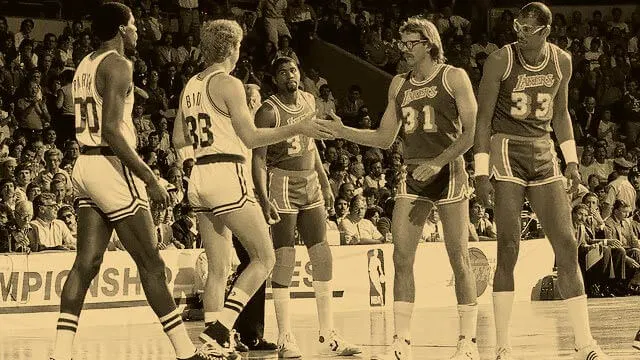

## **📃 Introduction**

It's time to dive into practicing Vectorized Operations with Series.

We'll work with NBA player statistics dating back to 1985. While this exercise focuses on Series, we'll initially read our data into a DataFrame.

You're unfamiliar with Series, and that's okay; just know that each column of a DataFrame is a Series. And a Series is a part of Pandas, that is really similar to NumPy Array.

Let's get started!

## **1️⃣ Data loading & overview**

### **📥 Data loading**

**Pandas import**

At the first, we need to import Pandas. Write the code to import Pandas in the code cell below.

> ⚠️ Don't forget to use the alias that is regularly used by all Data Analysts to import Pandas library.

In [3]:
# Your code
# Import các thư viện cần thiết
import pandas as pd                # Xử lý dữ liệu bảng
import numpy as np                # Xử lý giá trị thiếu, NaN, toán học
import dateparser                 # Parse ngày tháng từ chuỗi tự nhiên
from datetime import datetime     # Làm việc với thời gian
from collections import Counter   # Đếm lỗi hoặc dữ liệu bất thường
import math                       # Thư viện toán
import matplotlib.pyplot as plt
import seaborn as sns

**Loading data by URL**

The data to work is located in CSV file by the following link: https://raw.githubusercontent.com/RusAbk/sca_datasets/main/nba_player_stats_1985.csv

Read the given dataset into a pandas dataframe (usually has name `df`)

In [4]:
# Your code for loading data into dataframe
url = 'https://raw.githubusercontent.com/RusAbk/sca_datasets/main/nba_player_stats_1985.csv'
df = pd.read_csv(url)

df.sample(5)

,Player,height,weight,collage,born,G,MP,FG,FGA,FT,...,2PA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1284,Jordan Mickey,203.0,106.0,Louisiana State University,1994.0,41.0,198.0,23.0,56.0,13.0,...,55.0,19.0,28.0,47.0,8.0,3.0,17.0,10.0,17.0,59.0
2541,Zabian Dowdell,190.0,86.0,Virginia Polytechnic Institute and State Unive...,1984.0,24.0,292.0,51.0,125.0,16.0,...,115.0,5.0,15.0,20.0,51.0,20.0,2.0,29.0,30.0,121.0
1157,Jeremy Tyler,208.0,117.0,NaN,1991.0,125.0,1102.0,166.0,373.0,63.0,...,372.0,104.0,185.0,289.0,26.0,24.0,44.0,74.0,174.0,395.0
136,Anthony Pullard,208.0,111.0,McNeese State University,1966.0,8.0,37.0,8.0,18.0,1.0,...,18.0,2.0,6.0,8.0,2.0,2.0,2.0,5.0,5.0,17.0
442,Cliff Alexander,203.0,111.0,University of Kansas,1995.0,8.0,36.0,5.0,10.0,0.0,...,10.0,2.0,4.0,6.0,0.0,1.0,2.0,1.0,1.0,10.0


### **👁️ The first sight**

**Columns**

Also, it's a very common action at the beginning to output the list of all the columns in the dataframe.

In [5]:
# Your code showing the list of columns
df.columns  # Liệt kê tên các cột trong dataframe

Index(['Player', 'height', 'weight', 'collage', 'born', 'G', 'MP', 'FG', 'FGA',
       'FT', 'FTA', '3P', '3PA', '2P', '2PA', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

**Data structure overview**

Another common action is to check the data structure. Output an overview of the columns in the cell below.

In [6]:
# Your code showing dataframe columns' types
df.info()   # Show dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553 entries, 0 to 2552
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   2553 non-null   object 
 1   height   2553 non-null   float64
 2   weight   2553 non-null   float64
 3   collage  2237 non-null   object 
 4   born     2553 non-null   float64
 5   G        2553 non-null   float64
 6   MP       2553 non-null   float64
 7   FG       2553 non-null   float64
 8   FGA      2553 non-null   float64
 9   FT       2553 non-null   float64
 10  FTA      2553 non-null   float64
 11  3P       2553 non-null   float64
 12  3PA      2553 non-null   float64
 13  2P       2553 non-null   float64
 14  2PA      2553 non-null   float64
 15  ORB      2553 non-null   float64
 16  DRB      2553 non-null   float64
 17  TRB      2553 non-null   float64
 18  AST      2553 non-null   float64
 19  STL      2553 non-null   float64
 20  BLK      2553 non-null   float64
 21  TOV      2553 

**The first 5 rows**

Before performing any operation with data, you need to take a look to ensure that everything is okay with the loaded data.

In the cell below, write a code to output the first 5 rows of the dataframe.

In [7]:
# Your code showing the first 5 row
df.head()

,Player,height,weight,collage,born,G,MP,FG,FGA,FT,...,2PA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,A.C. Green,203.0,106.0,NaN,1960.0,1361.0,39044.0,4778.0,9686.0,3247.0,...,9177.0,3576.0,6553.0,10129.0,1469.0,1103.0,562.0,1508.0,2581.0,12928.0
1,A.J. Bramlett,196.0,88.0,NaN,1973.0,8.0,61.0,4.0,21.0,0.0,...,21.0,12.0,10.0,22.0,0.0,1.0,0.0,3.0,13.0,8.0
2,A.J. English,196.0,95.0,NaN,1963.0,151.0,3108.0,617.0,1418.0,259.0,...,1353.0,140.0,175.0,315.0,320.0,57.0,24.0,203.0,287.0,1502.0
3,A.J. Guyton,208.0,99.0,NaN,1976.0,80.0,1246.0,166.0,440.0,37.0,...,247.0,22.0,58.0,80.0,147.0,20.0,12.0,62.0,58.0,442.0
4,A.J. Hammons,198.0,99.0,NaN,1993.0,22.0,163.0,17.0,42.0,9.0,...,32.0,8.0,28.0,36.0,4.0,1.0,13.0,10.0,21.0,48.0


## **2️⃣ Calculations**

### **🎯 Field goal accuracy**

**Average field goal accuracy**

Calculate the average **"Field Goal accuracy"** by dividing the sum of field goals (the column FG) by the sum of their total attempts (the column FGA) then multiply by 100.

Store the result in the variable `field_goal_perc`.

In [8]:
# Your code to calculate
# Calculate the average field goal accuracy
field_goal_perc = (df['FG'].sum() / df['FGA'].sum())*100

# Output the result
field_goal_perc

45.822456100758025

In [9]:
# Output the value
print("Field_goal_perc (average):" , field_goal_perc)

Field_goal_perc (average): 45.822456100758025


In [10]:
# Output the value
print(f"Field_goal_perc (average): {field_goal_perc:.2f}%")

Field_goal_perc (average): 45.82%


**Field goal accuracy only for Michael Jordan**


Now let's check one of the most famous players in the NBA history: **Michael Jordan**.

Calculate the **"Field Goal accuracy"** only for Michael Jordan.

Store the result in the variable `mj_field_goal_perc`.

> **⚠️ Pay attention!**
>
> In the dataset his name is `'Michael Jordan*'`.
>
> The star (*) next to the player's name is because that player was selected for the "Hall of Fame" of the NBA.

In [11]:
# Your code to calculate
# Filter the data in column player for Michael Jordan*
mj_data = df[df['Player'] == 'Michael Jordan*']

# Calculate the field goal accuracy for Michael Jordan
mj_field_goal_perc = (mj_data['FG'].sum() / mj_data['FGA'].sum())

# Output the result
mj_field_goal_perc

0.4968822594449199

In [12]:
# Output the value
print("Michael Jordan's field_goal_perc:" , float(mj_field_goal_perc))

Michael Jordan's field_goal_perc: 0.4968822594449199


In [13]:
# Output the value
print(f"Michael Jordan's field_goal_perc: {mj_field_goal_perc:.3f}")

Michael Jordan's field_goal_perc: 0.497


### **⛹🏼‍♂️ Field goals per game**

**Average field goals per game**

Calculate the "Field Goals per Game" using the columns FG and games played (column "G").

Store your results in the variable `field_goals_per_game`

In [14]:
# Your code to calculate
field_goals_per_game = df['FG'].sum() / df['G'].sum()
field_goals_per_game

3.6677705816222055

In [15]:
# Output the value
print("Field_goals_per_game (average):" , float(field_goals_per_game))

Field_goals_per_game (average): 3.6677705816222055


In [16]:
# Output the value
print(f"Field_goals_per_game (average): {field_goals_per_game}")

Field_goals_per_game (average): 3.6677705816222055


**Field goal accuracy only for Michael Jordan**

Now let's do the same, but only for **Michael Jordan**.

Calculate the **"Field Goal accuracy"** only for Michael Jordan.

Store the result in the variable `mj_field_goals_per_game`.

In [17]:
# Your code to calculate
mj_field_goals_per_game = (mj_data['FG'].sum() / mj_data['G'].sum())
mj_field_goals_per_game

11.373134328358208

In [18]:
# Output the value
print("Michael Jordan's field_goals_per_game:" , float(mj_field_goals_per_game))

Michael Jordan's field_goals_per_game: 11.373134328358208


In [19]:
# Output the value
print(f"Michael Jordan's field_goals_per_game: {mj_field_goals_per_game:.2f}")

Michael Jordan's field_goals_per_game: 11.37


### **➕ Add the column 'Total Points'**

In the NBA lingo, field goals account for all the "goals" (column "FG") scored by a player, EXCEPT free throws (column "FT").

So, if we want to calculate the total number of points scored by a player, we must add field goals and free throws.

Field goals are a combination of 2-point and 3-point goals. For this exercise, you can safely assume that all "field goals" have a value of 2.

Calculate Total Points scored by a player, by adding the series containing field goals and free throws. Store your results in the new column `total_points`.

In [20]:
# Your code adding total_points column
# Calculate total points scored by each player
df['total_points'] = (df['FG'] * 2) + df['FT']

# Display the first few rows to verify the new column
df.sample(5)

,Player,height,weight,collage,born,G,MP,FG,FGA,FT,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,total_points
323,Calvin Natt,198.0,99.0,University of Louisiana at Monroe,1957.0,237.0,6087.0,1374.0,2666.0,912.0,...,437.0,901.0,1338.0,496.0,164.0,55.0,416.0,448.0,3662.0,3660.0
1084,Jared Reiner,211.0,115.0,University of Iowa,1982.0,46.0,376.0,25.0,73.0,4.0,...,34.0,75.0,109.0,14.0,8.0,13.0,23.0,80.0,54.0,54.0
1087,Jarell Martin,208.0,108.0,Louisiana State University,1994.0,69.0,938.0,112.0,267.0,85.0,...,81.0,167.0,248.0,23.0,25.0,16.0,47.0,149.0,318.0,309.0
1621,Mark Jones,206.0,102.0,Albany State University,1953.0,10.0,116.0,9.0,31.0,5.0,...,6.0,7.0,13.0,6.0,5.0,2.0,3.0,16.0,23.0,23.0
991,Ira Newble,201.0,99.0,Miami University,1975.0,429.0,8343.0,858.0,1927.0,301.0,...,450.0,789.0,1239.0,360.0,232.0,113.0,323.0,764.0,2118.0,2017.0


In [21]:
# Output the first 5 dataframe rows
df.head()

,Player,height,weight,collage,born,G,MP,FG,FGA,FT,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,total_points
0,A.C. Green,203.0,106.0,NaN,1960.0,1361.0,39044.0,4778.0,9686.0,3247.0,...,3576.0,6553.0,10129.0,1469.0,1103.0,562.0,1508.0,2581.0,12928.0,12803.0
1,A.J. Bramlett,196.0,88.0,NaN,1973.0,8.0,61.0,4.0,21.0,0.0,...,12.0,10.0,22.0,0.0,1.0,0.0,3.0,13.0,8.0,8.0
2,A.J. English,196.0,95.0,NaN,1963.0,151.0,3108.0,617.0,1418.0,259.0,...,140.0,175.0,315.0,320.0,57.0,24.0,203.0,287.0,1502.0,1493.0
3,A.J. Guyton,208.0,99.0,NaN,1976.0,80.0,1246.0,166.0,440.0,37.0,...,22.0,58.0,80.0,147.0,20.0,12.0,62.0,58.0,442.0,369.0
4,A.J. Hammons,198.0,99.0,NaN,1993.0,22.0,163.0,17.0,42.0,9.0,...,8.0,28.0,36.0,4.0,1.0,13.0,10.0,21.0,48.0,43.0


### **❓ Statistics on the top 25% by total points?**

Filter top 25% of players by total points and save it into the variable named `ft_top_25perc`

In [22]:
# Your code
# Calculate the 75th percentile value of total points
percentile_75 = df['total_points'].quantile(0.75)

# Filter the top 25% of players by total points
ft_top_25perc = df[df['total_points'] >= percentile_75]

# Display the filtered dataframe
ft_top_25perc

,Player,height,weight,collage,born,G,MP,FG,FGA,FT,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,total_points
0,A.C. Green,203.0,106.0,NaN,1960.0,1361.0,39044.0,4778.0,9686.0,3247.0,...,3576.0,6553.0,10129.0,1469.0,1103.0,562.0,1508.0,2581.0,12928.0,12803.0
7,Aaron Brooks,183.0,73.0,University of Oregon,1985.0,797.0,17088.0,2829.0,6893.0,1156.0,...,323.0,1037.0,1360.0,2485.0,469.0,113.0,1272.0,1544.0,7839.0,6814.0
11,Aaron McKie,196.0,94.0,Temple University,1972.0,957.0,22594.0,2554.0,5923.0,1087.0,...,580.0,2459.0,3039.0,2462.0,1090.0,199.0,1225.0,1882.0,6636.0,6195.0
14,Aaron Williams,206.0,99.0,Xavier University,1971.0,838.0,13669.0,1777.0,3577.0,1063.0,...,1159.0,2015.0,3174.0,525.0,320.0,597.0,742.0,2030.0,4618.0,4617.0
26,Adrian Dantley*,196.0,94.0,University of Notre Dame,1956.0,482.0,15865.0,3565.0,6848.0,3237.0,...,834.0,1262.0,2096.0,1214.0,334.0,62.0,1125.0,1155.0,10370.0,10367.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,Xavier McDaniel,201.0,92.0,Wichita State University,1963.0,951.0,27835.0,6263.0,12871.0,2379.0,...,2255.0,3615.0,5870.0,1962.0,867.0,462.0,2071.0,2821.0,14979.0,14905.0
2534,Yao Ming*,229.0,140.0,NaN,1980.0,486.0,15818.0,3380.0,6445.0,2485.0,...,1233.0,3261.0,4494.0,769.0,189.0,920.0,1311.0,1596.0,9247.0,9245.0
2543,Zach Randolph,206.0,117.0,Michigan State University,1981.0,1107.0,34865.0,7490.0,15884.0,3602.0,...,3339.0,6976.0,10315.0,2025.0,835.0,307.0,2288.0,2643.0,18762.0,18582.0
2547,Zaza Pachulia,211.0,122.0,NaN,1984.0,961.0,20390.0,2374.0,5102.0,2026.0,...,2174.0,3555.0,5729.0,1233.0,699.0,344.0,1316.0,2465.0,6774.0,6774.0


Output descriptive statistics on the dataframe containing the top 25% of players by total points

In [23]:
# Your code showing statistics
descriptive_stats = ft_top_25perc.describe()

# Display the descriptive statistics
descriptive_stats

,height,weight,born,G,MP,FG,FGA,FT,FTA,3P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,total_points
count,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,...,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000
mean,199.902973,96.593114,1971.244131,805.663537,22214.006260,3707.701095,8018.826291,1928.477308,2519.627543,491.915493,...,1084.973396,2768.787167,3853.760563,2229.510172,743.241002,445.377152,1388.356808,1885.386541,9835.794992,9343.879499
std,9.769441,12.562085,12.350797,258.979032,9210.212439,1919.029692,4048.295084,1268.768868,1635.627712,534.579320,...,822.228656,1751.365717,2502.102157,1862.192456,441.435914,501.131860,712.048914,780.106368,5205.705505,4990.099049
min,160.000000,60.000000,1920.000000,245.000000,7640.000000,1499.000000,2480.000000,378.000000,529.000000,0.000000,...,132.000000,488.000000,750.000000,189.000000,136.000000,11.000000,351.000000,538.000000,4037.000000,4026.000000
25%,193.000000,87.000000,1963.000000,613.500000,14986.000000,2260.000000,5004.000000,1047.000000,1415.500000,26.000000,...,453.000000,1547.000000,2026.500000,943.000000,425.000000,137.500000,846.500000,1274.000000,5951.000000,5644.500000
50%,201.000000,97.000000,1971.000000,796.000000,20109.000000,3109.000000,6935.000000,1521.000000,2001.000000,336.000000,...,856.000000,2309.000000,3223.000000,1661.000000,615.000000,280.000000,1209.000000,1758.000000,8208.000000,7684.000000
75%,206.000000,104.000000,1981.000000,965.000000,27732.500000,4553.000000,9850.500000,2459.500000,3200.500000,835.000000,...,1464.000000,3490.000000,4796.500000,2962.000000,958.500000,550.500000,1739.000000,2382.000000,12246.000000,11614.000000
max,229.000000,147.000000,1995.000000,1644.000000,54981.000000,13528.000000,26210.000000,9787.000000,13188.000000,3174.000000,...,4744.000000,11716.000000,15091.000000,15806.000000,3265.000000,3830.000000,4524.000000,4856.000000,36928.000000,36843.000000
